<a href="https://colab.research.google.com/github/andrewshiva/Performing-Clustering-Analysis-on-Mall-Customers-Clustering-Analysis-./blob/master/Performing_Clustering_Analysis_on_Mall_Customers_Clustering_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [11]:
 df = pd.read_csv('/content/datasets_42674_74935_Mall_Customers.csv')
 df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


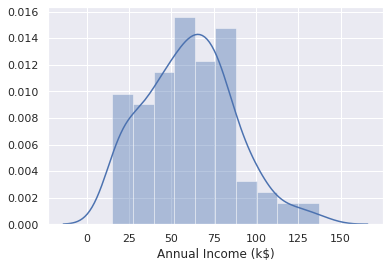

In [14]:
sns.distplot(df['Annual Income (k$)'])


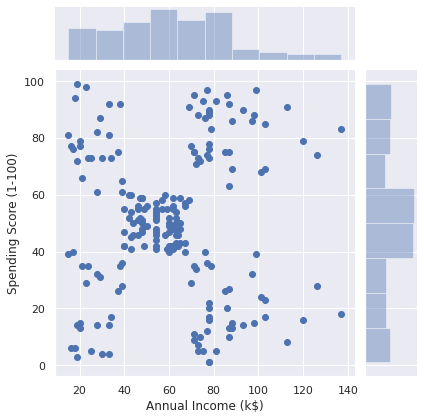

In [18]:
sns.jointplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])

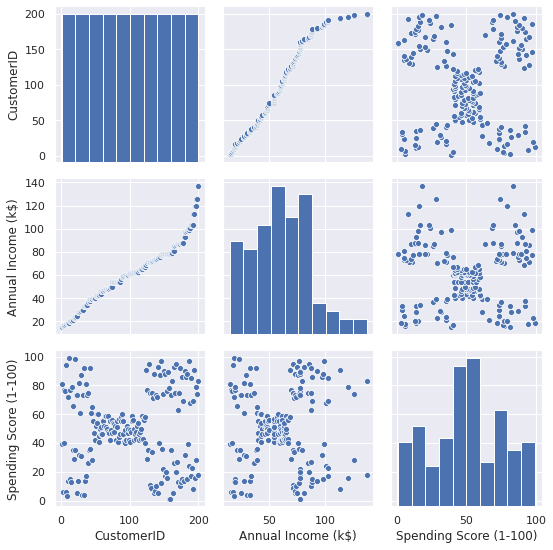

In [21]:
sns.pairplot(df[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [23]:
kmeans = KMeans(random_state=42)
X = df[['Annual Income (k$)','Spending Score (1-100)']]
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [24]:
y_preds = kmeans.predict(X)
y_preds

array([5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 3, 4, 3, 4,
       1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 7, 4, 7, 4, 7, 4, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6], dtype=int32)

In [25]:
df['cluster'] = y_preds
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,0
2,3,Female,20,16,6,5
3,4,Female,23,16,77,0
4,5,Female,31,17,40,5


In [26]:
df['cluster'] = y_preds
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
195,196,Female,35,120,79,6
196,197,Female,45,126,28,7
197,198,Male,32,126,74,6
198,199,Male,32,137,18,7
199,200,Male,30,137,83,6


In [27]:
import numpy as np
df.pivot_table(values=['Annual Income (k$)', 'Spending Score (1-100)'], index='cluster', aggfunc=np.mean)

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,25.095238,80.047619
1,63.952381,46.214286
2,47.659091,51.613636
3,80.181818,12.681818
4,80.375000,82.937500
5,25.727273,20.227273
6,114.714286,78.428571
7,109.700000,22.000000


In [30]:
import altair as alt
chart = alt.Chart(df)
scatter_plot = chart.mark_circle()
scatter_plot.encode(x='Annual Income (k$)', y='Spending Score (1-100)', color='cluster:N')


alt.Chart(...)